In [41]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Load data
data = pd.read_csv("data.csv")
data.head(3)

C:\Users\Owner\AppData\Local\Temp\ipykernel_25548\2434425709.py:2: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data.csv")


,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name
0,TA,109C,BH,32.8889,-117.1051,150.0,700.0,manual,0.5,17.080000,...,None,None,0.92,102.09,159.3,[56.79999924 55.40000153 47.40000153],[[2896.]],2006-07-23 15:59:00.960000,earthquake_local,109C.TA_20060723155859_EV
1,TA,109C,BH,32.8889,-117.1051,150.0,600.0,manual,0.5,16.879999,...,None,None,0.91,101.34,281.7,[65. 65.5 61.40000153],[[5508.]],2006-11-03 15:56:53.610000,earthquake_local,109C.TA_20061103155652_EV
2,TA,109C,BH,32.8889,-117.1051,150.0,500.0,manual,0.5,17.260000,...,None,None,0.92,101.87,280.5,[37.20000076 42. 38.59999847],[[3114.]],2006-11-03 16:12:24.700000,earthquake_local,109C.TA_20061103161223_EV


In [43]:
data.dtypes

network_code                         object
receiver_code                        object
receiver_type                        object
receiver_latitude                   float64
receiver_longitude                  float64
receiver_elevation_m                float64
p_arrival_sample                    float64
p_status                             object
p_weight                            float64
p_travel_sec                        float64
s_arrival_sample                    float64
s_status                             object
s_weight                            float64
source_id                            object
source_origin_time                   object
source_origin_uncertainty_sec        object
source_latitude                     float64
source_longitude                    float64
source_error_sec                     object
source_gap_deg                       object
source_horizontal_uncertainty_km     object
source_depth_km                      object
source_depth_uncertainty_km     

data analytics start

In [44]:
data.shape

(200000, 35)

In [45]:
data.describe()

,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_weight,p_travel_sec,s_arrival_sample,s_weight,source_latitude,source_longitude,source_magnitude,source_distance_deg,source_distance_km,back_azimuth_deg
count,200000.000000,200000.000000,200000.000000,200000.000000,199937.000000,200000.000000,200000.000000,199943.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,33.734235,-112.090444,1103.642794,661.487463,0.681587,7.387482,1204.963810,0.617248,33.714834,-112.803658,1.328498,0.370168,41.153621,196.981775
std,11.099382,43.044915,540.861686,181.186588,0.183430,5.682846,474.465309,0.213330,11.079471,41.098881,0.848106,0.334725,37.184304,96.340051
min,-33.204700,-174.197500,0.000000,22.000000,0.000000,0.000000,190.000000,0.000000,-33.313400,-179.996500,-0.100000,0.000000,0.000000,0.000000
25%,33.598182,-120.424800,775.400000,500.000000,0.590000,3.420000,900.000000,0.560000,33.468670,-120.452168,0.710000,0.144300,16.050000,129.900000
50%,33.611570,-116.596005,1271.000000,698.000000,0.630000,5.670000,1113.000000,0.590000,33.662332,-116.745833,1.120000,0.279900,31.110000,186.100000
75%,35.831000,-116.456370,1392.000000,800.000000,0.880000,9.560000,1392.000000,0.770000,35.751000,-116.453333,1.750000,0.495625,55.080000,290.800000
max,65.616000,179.300000,2894.000000,2261.000000,1.000000,55.910000,5644.000000,1.000000,67.271100,179.996000,6.500000,3.000000,334.150000,360.000000


<AxesSubplot:title={'center':'Unique values'}>

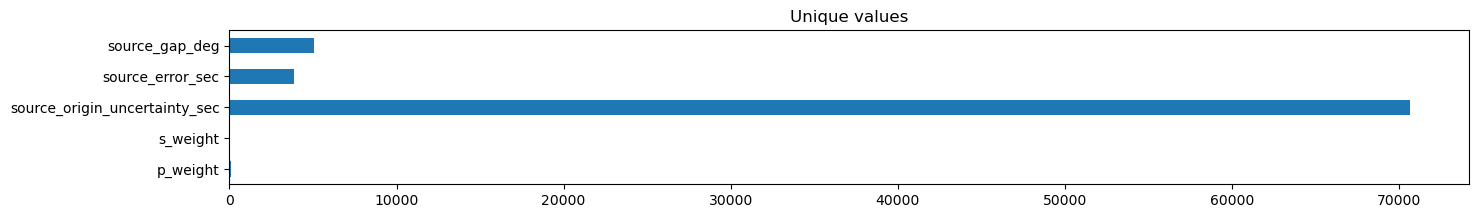

In [46]:
# Missing values
null_value_col = data.columns[data.isna().any()]
null_value = data[null_value_col].isnull().sum()
null_value.plot(kind='barh', figsize=(16, 2), title='Unique values')

In [47]:
data[null_value_col].dtypes

p_weight                         float64
s_weight                         float64
source_origin_uncertainty_sec     object
source_error_sec                  object
source_gap_deg                    object
dtype: object

In [48]:
# Handle float values
def handle_float_missing_value():
    print('aa')

In [49]:
# seperate columns based on dtypes
int_data = data.select_dtypes(include='int').columns.tolist()
float_data = data.select_dtypes(include='float64').columns.tolist()
object_data = data.select_dtypes(include='object').columns.tolist()

print("Int value column: ", int_data)
print("")
print("Float value column: ", float_data)
print("")
print("Object value column: ", object_data)
print("")

Int value column:  []

Float value column:  ['receiver_latitude', 'receiver_longitude', 'receiver_elevation_m', 'p_arrival_sample', 'p_weight', 'p_travel_sec', 's_arrival_sample', 's_weight', 'source_latitude', 'source_longitude', 'source_magnitude', 'source_distance_deg', 'source_distance_km', 'back_azimuth_deg']

Object value column:  ['network_code', 'receiver_code', 'receiver_type', 'p_status', 's_status', 'source_id', 'source_origin_time', 'source_origin_uncertainty_sec', 'source_error_sec', 'source_gap_deg', 'source_horizontal_uncertainty_km', 'source_depth_km', 'source_depth_uncertainty_km', 'source_magnitude_type', 'source_magnitude_author', 'source_mechanism_strike_dip_rake', 'snr_db', 'coda_end_sample', 'trace_start_time', 'trace_category', 'trace_name']



In [50]:
# Check duplicate values into data
dup_value = data.duplicated(keep='last').sum()
print("Total duplicate values in dataset: ", dup_value)

Total duplicate values in dataset:  0


In [51]:
# Lable encoding of object data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
col = ['network_code', 'receiver_code', 'receiver_type', 'p_status', 's_status', 'source_id', 'source_magnitude_type', 'source_magnitude_author', 'trace_category']
label_coder = LabelEncoder()
def label_encoding(col):
    data[col] = label_coder.fit_transform(data[col])

for i in col:
    label_encoding(i)


In [52]:
# handle date and time
data['source_origin_time'] = pd.to_datetime(data['source_origin_time'])
data['source_origin_time'] = (data['source_origin_time'] - data['source_origin_time'].min()) / np.timedelta64(1, 'D')
data

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name
0,37,0,0,32.8889,-117.105100,150.0,700.0,2,0.50,17.080000,...,7,None,0.9200,102.09,159.3,[56.79999924 55.40000153 47.40000153],[[2896.]],2006-07-23 15:59:00.960000,0,109C.TA_20060723155859_EV
1,37,0,0,32.8889,-117.105100,150.0,600.0,2,0.50,16.879999,...,7,None,0.9100,101.34,281.7,[65. 65.5 61.40000153],[[5508.]],2006-11-03 15:56:53.610000,0,109C.TA_20061103155652_EV
2,37,0,0,32.8889,-117.105100,150.0,500.0,2,0.50,17.260000,...,7,None,0.9200,101.87,280.5,[37.20000076 42. 38.59999847],[[3114.]],2006-11-03 16:12:24.700000,0,109C.TA_20061103161223_EV
3,37,0,0,32.8889,-117.105100,150.0,900.0,2,0.50,17.280001,...,7,None,0.9300,103.26,281.6,[54.09999847 54.90000153 45.5 ],[[3152.]],2006-11-14 13:32:22.540000,0,109C.TA_20061114133221_EV
4,37,0,0,32.8889,-117.105100,150.0,700.0,2,0.50,18.139999,...,7,None,0.9200,102.48,4.7,[58.20000076 56.20000076 53.79999924],[[3134.]],2006-11-27 10:46:41.060000,0,109C.TA_20061127104640_EV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,32,201,1,33.4955,-116.602667,1139.0,692.0,1,0.83,10.730000,...,1,None,0.5665,62.21,327.7,[23.29999924 25. 20.89999962],[[2126.]],2011-11-02 15:32:01.620000,0,B087.PB_20111102153200_EV
199996,32,201,1,33.4955,-116.602667,1139.0,900.0,2,0.67,7.160000,...,1,None,0.3702,41.17,161.2,[26.20000076 25.70000076 24.60000038],[[2483.]],2011-11-02 19:07:21.300000,0,B087.PB_20111102190720_EV
199997,32,201,1,33.4955,-116.602667,1139.0,700.0,2,0.59,4.630000,...,1,None,0.1981,22.03,327.8,[11.89999962 12.30000019 10.60000038],[[1763.]],2011-11-02 20:03:03.500000,0,B087.PB_20111102200302_EV
199998,32,201,1,33.4955,-116.602667,1139.0,700.0,2,0.62,3.460000,...,1,None,0.1664,18.51,96.2,[22.29999924 16.89999962 16.39999962],[[1620.]],2011-11-02 21:17:42.080000,0,B087.PB_20111102211741_EV


In [53]:
data.dtypes

network_code                          int32
receiver_code                         int32
receiver_type                         int32
receiver_latitude                   float64
receiver_longitude                  float64
receiver_elevation_m                float64
p_arrival_sample                    float64
p_status                              int32
p_weight                            float64
p_travel_sec                        float64
s_arrival_sample                    float64
s_status                              int32
s_weight                            float64
source_id                             int32
source_origin_time                  float64
source_origin_uncertainty_sec        object
source_latitude                     float64
source_longitude                    float64
source_error_sec                     object
source_gap_deg                       object
source_horizontal_uncertainty_km     object
source_depth_km                      object
source_depth_uncertainty_km     

In [54]:
# Handle None value in each column
col = data.columns.tolist()

drop_col = ['source_origin_uncertainty_sec','source_mechanism_strike_dip_rake', 'snr_db', 'coda_end_sample', 'trace_name']

for i in drop_col:
    ind = col.index(i)
    col.pop(ind)

In [56]:
def handle_none(col):
    mean = data[col].mean()
    data[col] = data[col].fillna(mean)

for i in col:
    handle_none(i)

TypeError: can only concatenate str (not "int") to str

In [ ]:
# Made model to fill null values
X = data[col]
y = data['source_origin_uncertainty_sec']
data[col]

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_depth_km,source_depth_uncertainty_km,source_magnitude,source_magnitude_type,source_magnitude_author,source_distance_deg,source_distance_km,back_azimuth_deg,trace_start_time,trace_category
0,37,0,0,32.8889,-117.105100,150.0,700.0,2,0.50,17.080000,...,0.45,None,3.60,9,7,0.9200,102.09,159.3,2006-07-23 15:59:00.960000,0
1,37,0,0,32.8889,-117.105100,150.0,600.0,2,0.50,16.879999,...,9.2,None,4.30,1,7,0.9100,101.34,281.7,2006-11-03 15:56:53.610000,0
2,37,0,0,32.8889,-117.105100,150.0,500.0,2,0.50,17.260000,...,12.66,None,3.60,9,7,0.9200,101.87,280.5,2006-11-03 16:12:24.700000,0
3,37,0,0,32.8889,-117.105100,150.0,900.0,2,0.50,17.280001,...,11.5,None,3.80,9,7,0.9300,103.26,281.6,2006-11-14 13:32:22.540000,0
4,37,0,0,32.8889,-117.105100,150.0,700.0,2,0.50,18.139999,...,7.26,None,3.60,9,7,0.9200,102.48,4.7,2006-11-27 10:46:41.060000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,32,201,1,33.4955,-116.602667,1139.0,692.0,1,0.83,10.730000,...,15.53,1.0,1.37,9,1,0.5665,62.21,327.7,2011-11-02 15:32:01.620000,0
199996,32,201,1,33.4955,-116.602667,1139.0,900.0,2,0.67,7.160000,...,8.76,1.16,1.44,9,1,0.3702,41.17,161.2,2011-11-02 19:07:21.300000,0
199997,32,201,1,33.4955,-116.602667,1139.0,700.0,2,0.59,4.630000,...,14.36,0.63,0.63,9,1,0.1981,22.03,327.8,2011-11-02 20:03:03.500000,0
199998,32,201,1,33.4955,-116.602667,1139.0,700.0,2,0.62,3.460000,...,8.58,1.14,0.68,9,1,0.1664,18.51,96.2,2011-11-02 21:17:42.080000,0


In [ ]:
data[col].dtypes

network_code                          int32
receiver_code                         int32
receiver_type                         int32
receiver_latitude                   float64
receiver_longitude                  float64
receiver_elevation_m                float64
p_arrival_sample                    float64
p_status                              int32
p_weight                            float64
p_travel_sec                        float64
s_arrival_sample                    float64
s_status                              int32
s_weight                            float64
source_id                             int32
source_origin_time                  float64
source_latitude                     float64
source_longitude                    float64
source_error_sec                     object
source_gap_deg                       object
source_horizontal_uncertainty_km     object
source_depth_km                      object
source_depth_uncertainty_km          object
source_magnitude                

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=4, random_state=4)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression

In [ ]:
# building model
model = LinearRegression()
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'None'